# Radiation Modes of Hollow Core slab waveguide

Essentially the N1 Bragg fiber but in 1D.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
from scipy.optimize import newton
%matplotlib widget
plt.style.use('dark_background')

In [8]:
loss_min_wl = 5.828070175438596e-06
max_loss_wl = 6.90764472e-06

In [9]:
# A = SlabExact(scale=1e-6, ts=[1e-6, 2e-6, 3e-6, 2e-6, 1e-6],
#               ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 100, 200, 100, 100],
#               symmetric=True, wl=1e-6, shift=0)

A = SlabExact(scale=1e-5, Ts=[5, 1, 8, 1, 5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[500, 300, 600, 300, 500],
              symmetric=True, wl=loss_min_wl)

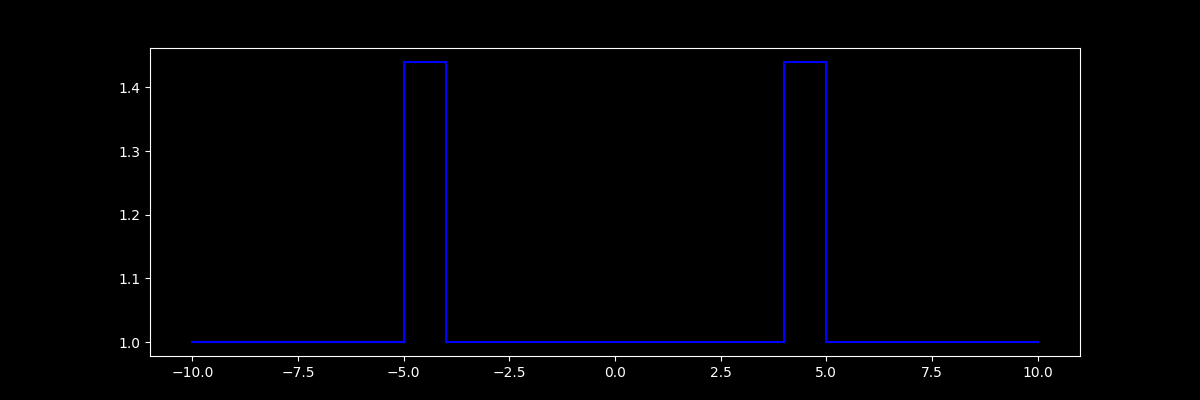

In [10]:
A.plot_refractive_index();


In [11]:
field_type = 'TE'
mode_type = 'radiation'
k_low = A.K_low
Z = .0001

In [12]:
A.Z_evanescent

10.780901941879483

In [26]:
Fs1 = A.fields_Z(.1*A.Z_evanescent, mode_type=mode_type)
# A.coefficients(

(<Figure size 1200x500 with 1 Axes>, <Axes: >)

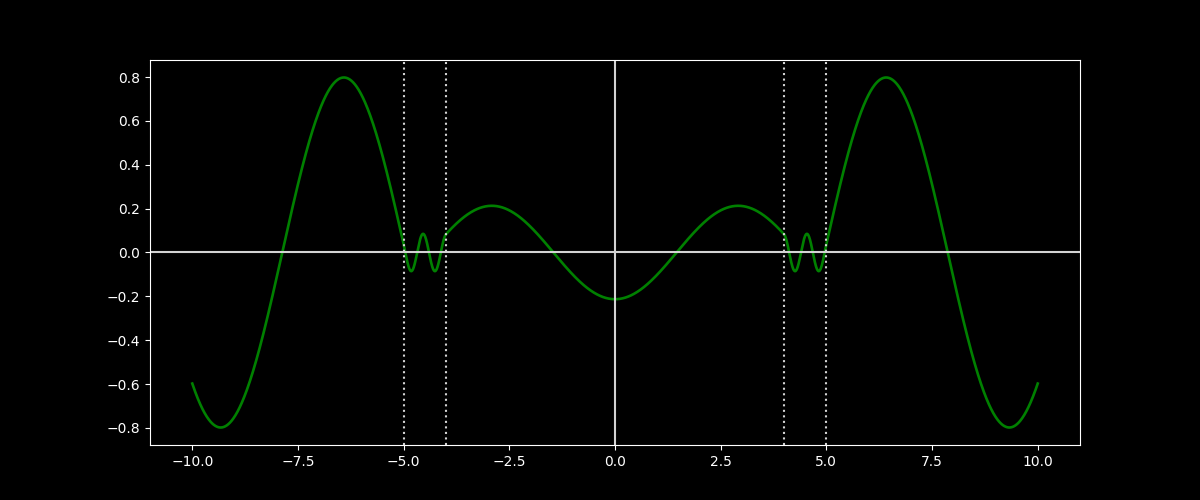

In [29]:
A.plot_field_1d(Fs1, plot_axis=True, linewidth=1.9, color='g', part='real')


It appears there is a bug in the radiation mode setup: no it was just a shifting issue.

## Seem to have a good deal of switching, check animation

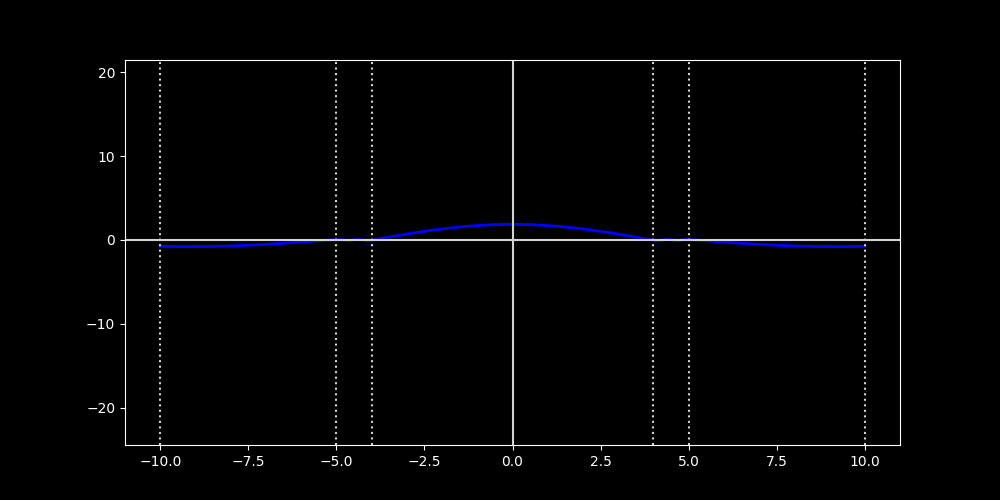

In [82]:
A.radiation_mode_Z_animation('hollow_core_radiation_mode_Z_animation', figsize=(10,5), fps=25, secs=4, sign='1',
                               Z_range=[.99*0.391, 1.01 * 0.391], paper_method=False, linewidth=2)

In [83]:
from IPython.display import HTML


HTML("""
<video alt="test" controls id="theVideo">
        <source src="hollow_core_radiation_mode_Z_animation.mp4" type="video/mp4">
</video>

<script>
video = document.getElementById("theVideo")
video.playbackRate = 1;
</script>
""")

Interesting sudden appearences of what appear to be almost leaky modes. Switching seems to happen near them

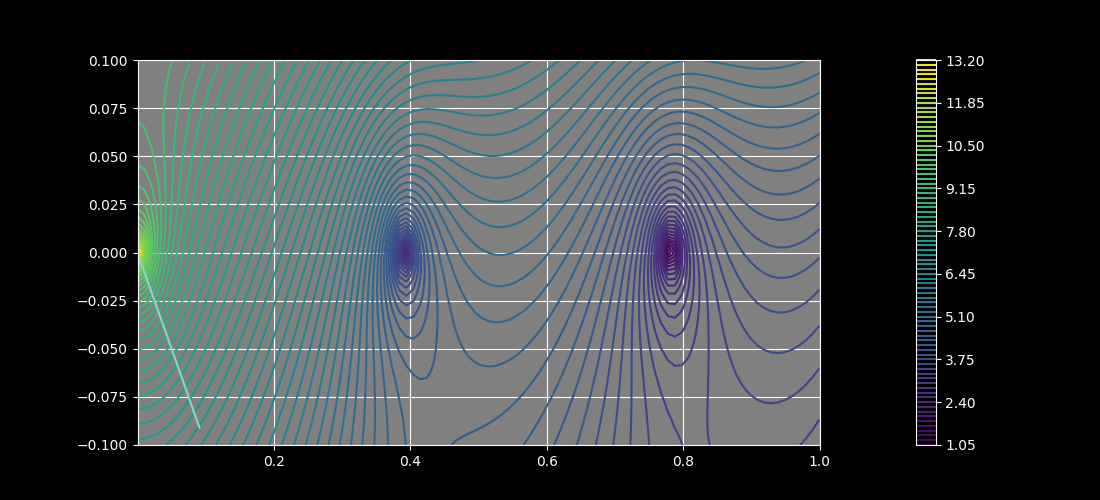

In [53]:
A.deteriminant_plot(0.0001, 1, -.1, .1)

In [79]:
Z = newton(A.determinant_Z, .4).conj()
Z

(0.3910920075748686+0.00031500044405575605j)

/home/pv/local/slab/slab.py:1019: UserWarning: Provided mode type leaky, but coefficients in outer region do not align with this. User may wish to check supplied propagation constant and/or rounding parameter.
  warn(message='Provided mode type %s, but coefficients in outer \


(<Figure size 1200x500 with 1 Axes>, <Axes: >)

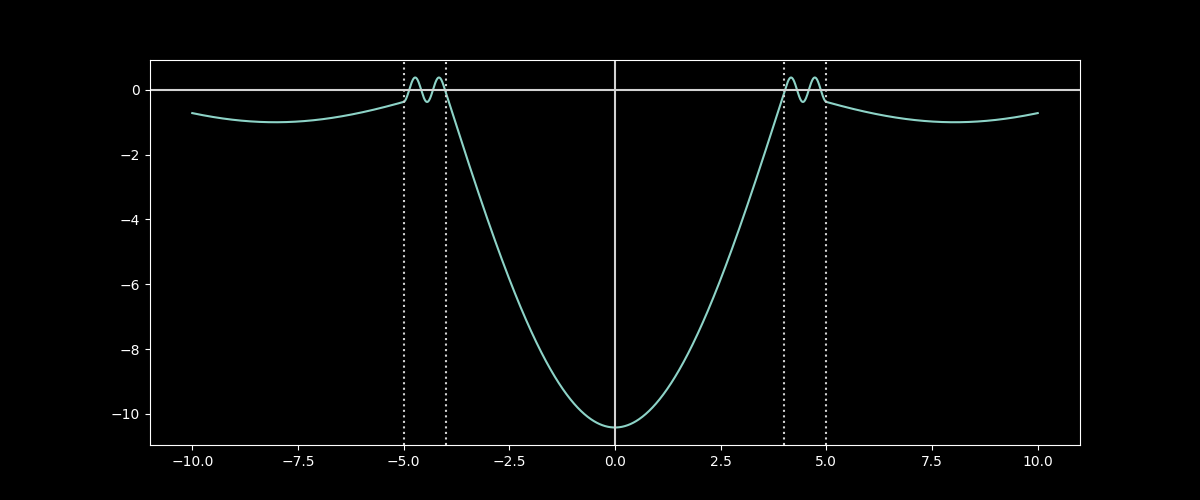

In [61]:
A.plot_field_1d(A.fields_Z(Z, mode_type='leaky'))